[*********************100%%**********************]  1 of 1 completed


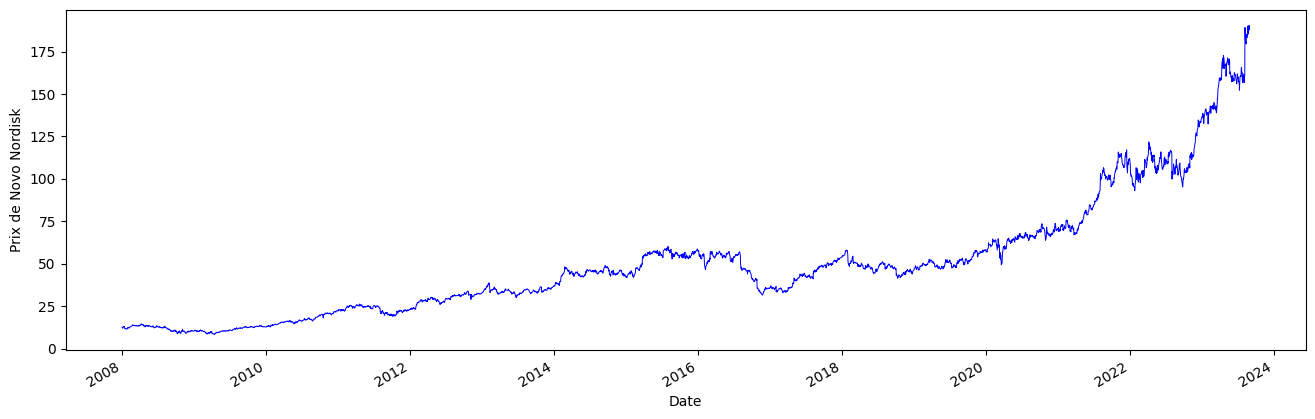

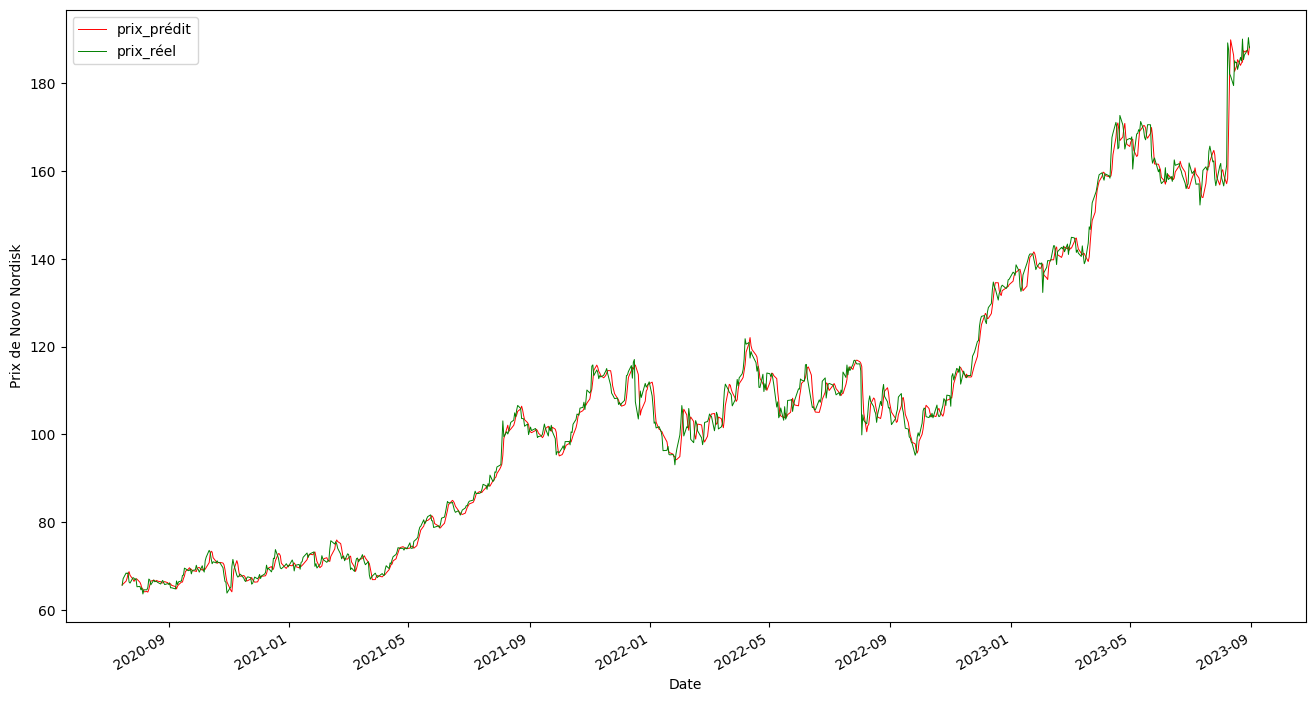

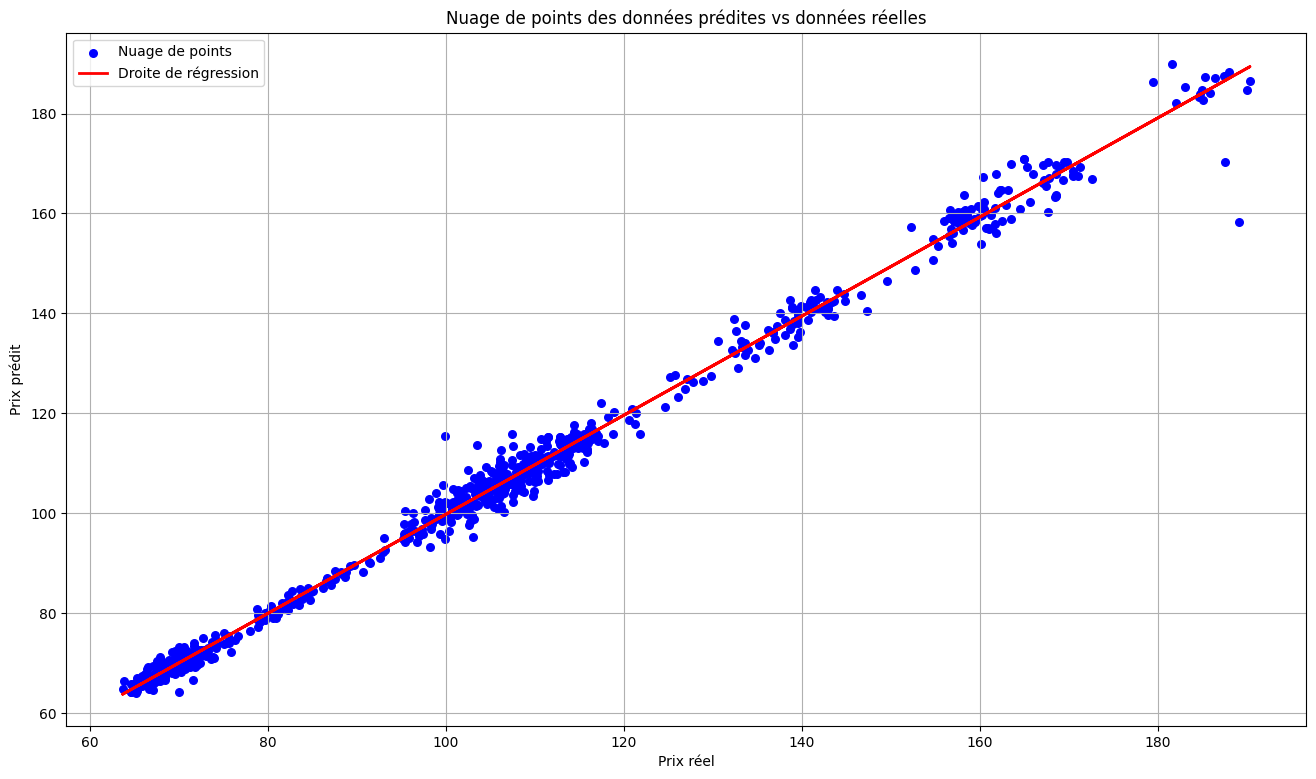

Coefficient de détermination (R-squared): 99.30


In [1]:
# Importer les bibliothèques nécessaires
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import yfinance as yf

# Lire les données
Df = yf.download('NVO', '2008-01-01', '2023-08-31')
# Conserver uniquement la colonne 'Close' (fermeture)*
Df = Df[['Close']]
# Supprimer les lignes avec des valeurs manquantes
Df = Df.dropna()

# Créer une figure et un axe pour un meilleur contrôle des propriétés du graphique
fig, ax = plt.subplots(figsize=(16, 5))

# Tracer le prix de clôture de NVO avec un style raffiné
Df.Close.plot(ax=ax, linewidth=0.7, linestyle='-', color='b')
ax.set_ylabel("Prix de Novo Nordisk")

plt.show()

# Calculer les moyennes mobiles
Df['MoyenneMobile_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['MoyenneMobile_9'] = Df['Close'].shift(1).rolling(window=9).mean()
Df = Df.dropna()
X = Df[['MoyenneMobile_3', 'MoyenneMobile_9']]
X.head()

y = Df['Close']
y.head()

t = 0.8
t = int(t * len(Df))

# Jeu de données d'entraînement
X_train = X[:t]
y_train = y[:t]
# Jeu de données de test
X_test = X[t:]
y_test = y[t:]

# Entraîner un modèle de régression linéaire
linear = LinearRegression().fit(X_train, y_train)

# Prédire les prix
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['prix'])

# Créer une nouvelle figure et un nouvel axe pour le prochain graphique
fig, ax = plt.subplots(figsize=(16, 9))

# Tracer les prédictions et les prix réels
predicted_price.plot(ax=ax, linewidth=0.7, linestyle='-', color='r')
y_test.plot(ax=ax, linewidth=0.7, linestyle='-', color='g')
plt.legend(['prix_prédit', 'prix_réel'])
ax.set_ylabel("Prix de Novo Nordisk")

plt.show()

# Calculer le coefficient de détermination (R-squared)
r2_score = linear.score(X[t:], y[t:]) * 100
float("{0:.2f}".format(r2_score))


# Créer une troisième figure et un axe pour le nuage de points avec la droite de régression
fig, ax = plt.subplots(figsize=(16, 9))

# Nuage de points des données réelles par rapport aux données prédites
plt.scatter(y_test.values, predicted_price.values, c='b', label='Nuage de points', marker='o', s=30)
plt.xlabel('Prix réel')
plt.ylabel('Prix prédit')
plt.title('Nuage de points des données prédites vs données réelles')

# Calculer la droite de régression
regression_line = LinearRegression().fit(y_test.values.reshape(-1, 1), predicted_price.values)
plt.plot(y_test.values, regression_line.predict(y_test.values.reshape(-1, 1)), color='red', linewidth=2, label='Droite de régression')

plt.grid(True)
plt.legend()

plt.show()

print("Coefficient de détermination (R-squared): {:.2f}".format(r2_score))